In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

In [2]:
def sigmoid(X):
    y = 1 / (1+np.exp(-X))
    return y

class LogisticRegression:

    def __init__(self, alpha=0.01, iteration=1000):
        """
        alpha     学习步长
        w         权重向量
        iteration 最大迭代次数
        error     记录损失函数值
        """
        self.alpha = alpha
        self.iteration = iteration
    
    def fit(self, X, y):
        [data_num, fea_num] = X.shape
        X_ = np.vstack((np.ones(data_num).reshape(1,-1), X.T))
        y_ = y.reshape(-1,1)
        self.w = np.zeros(fea_num+1).reshape(-1,1)
        self.error = []
        i = 1
        
        while i<self.iteration:
            # 迭代w值
            dif_y = y_ - sigmoid(np.dot(self.w.T,X_)).reshape(-1,1)
            self.w = self.w + self.alpha * 1/data_num * np.dot(X_, dif_y)
                
            # 记录损失
            p1 = sigmoid(np.dot(self.w.T,X_).T)
            temp = y_*np.log(p1) + (1-y_)*np.log(1-p1)
            self.error.append(-temp.mean())
            
            # 迭代次数
            if (i+1)%100==0:
                print('epoch--', i+1)
            i += 1
    
    def predict(self, X):
        X_ = np.vstack((np.ones(X.shape[0]).reshape(1,-1), X.T))
        sig = sigmoid(np.dot(self.w.T, X_))[0]
        return (sig>=0.5)*1

导入数据

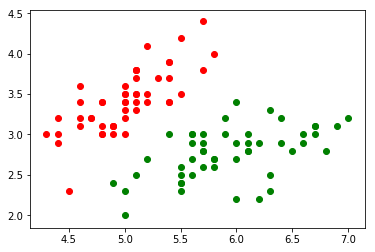

In [3]:
iris = load_iris()
X = iris.data[:100,:2]
y = (iris.target[:100]==1)*1

plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='green')

epoch-- 100
epoch-- 200
epoch-- 300
epoch-- 400
epoch-- 500
epoch-- 600
epoch-- 700
epoch-- 800
epoch-- 900
epoch-- 1000


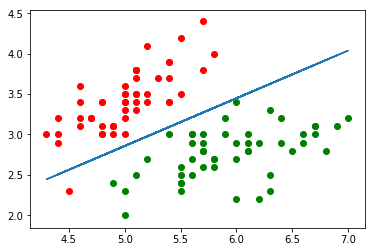

In [4]:
# 训练
clf=LogisticRegression()
clf.fit(X,y)
line1 = X[:,0]
line2 = -(clf.w[0]+clf.w[1]*line1)/clf.w[2]

# 画图
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='green')
plt.plot(line1,line2)